In [ ]:
! pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 12.7 MB/s 


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/MyDrive/project analysis/'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('gdrive/MyDrive/project analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

gdrive/MyDrive/project analysis/Bitcoin_tweets.csv
gdrive/MyDrive/project analysis/BTC-USD.csv
gdrive/MyDrive/project analysis/Bitcoin_tweets.csv.zip
gdrive/MyDrive/project analysis/BTC_tweets_daily_example.csv
gdrive/MyDrive/project analysis/splitted_files/output_1.csv
gdrive/MyDrive/project analysis/splitted_files/output_2.csv
gdrive/MyDrive/project analysis/splitted_files/output_3.csv
gdrive/MyDrive/project analysis/splitted_files/output_4.csv
gdrive/MyDrive/project analysis/splitted_files/output_5.csv
gdrive/MyDrive/project analysis/splitted_files/output_6.csv
gdrive/MyDrive/project analysis/splitted_files/output_7.csv
gdrive/MyDrive/project analysis/splitted_files/output_8.csv
gdrive/MyDrive/project analysis/splitted_files/output_9.csv
gdrive/MyDrive/project analysis/splitted_files/output_10.csv
gdrive/MyDrive/project analysis/splitted_files/output_11.csv
gdrive/MyDrive/project analysis/cleaned_files/Bitcoin_tweets_clean1.csv
gdrive/MyDrive/project analysis/cleaned_files/Bitcoin_t

In [ ]:
#! pip install vaderSentiment

In [ ]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
#!unzip "/content/gdrive/MyDrive/project analysis/Bitcoin_tweets.csv.zip" -d "/content/gdrive/MyDrive/project analysis"

In [ ]:
tweets_raw_file   = '/content/gdrive/MyDrive/project analysis/Bitcoin_tweets.csv'
tweets_clean_file = './Bitcoin_tweets_clean.csv'
bit_price_file2 = '/content/gdrive/MyDrive/project analysis/BTC-USD.csv'
#train_tweet = '/content/gdrive/MyDrive/project analysis/BTC_tweets_daily_example.csv'


In [ ]:
#tweets_clean_file_train = './Bitcoin_tweets_clean_train.csv'

In [ ]:
#merging all the files
# source https://towardsdatascience.com/how-to-merge-large-csv-files-into-a-single-file-with-python-c66696f595ff
import os
import pandas as pd

# 1. defining the path to csv files
path = "/content/gdrive/MyDrive/project analysis/cleaned_files/"

# 2. creating a list with files to merge based on name 
file_list = [path + f for f in os.listdir(path) if f.startswith('Bitcoin_tweets_clean')]

# 3. creating empty list to include the content of each file converted to pandas DF
csv_list = []
 
# 4. reads each (sorted) file in file_list, converts it to pandas DF and appends it to the csv_list
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

# 5. merges single pandas DFs into a single DF, index is refreshed 
csv_merged = pd.concat(csv_list, ignore_index=True)

# 6. Single DF is saved to the path in CSV format, without index column
csv_merged.to_csv(path + 'merged_clean_files.csv', index=False)

In [ ]:
csv_merged = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/merged_clean_files.csv")

In [ ]:
csv_merged = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/merged_clean_files.csv",dtype = {'tweets': 'object', 'cleaned_tweets': 'object'})

In [ ]:
df_clean = csv_merged.copy()
df_clean.dtypes

tweets            object
cleaned_tweets    object
date_clean        object
File_Name         object
dtype: object

In [ ]:
df_clean

,tweets,cleaned_tweets,date_clean,File_Name
0,#BTC Price Prediction 2021: @jpmorgan is my fr...,Price Prediction friend Victorian banker He sa...,2021-02-14,Bitcoin_tweets_clean1.csv
1,🚀🚀🚀 $XMR Long Position(v1) 🚀🚀🚀\nEntry Price: 2...,XMR Long Position v Entry Price Target Stop,2021-06-21,Bitcoin_tweets_clean1.csv
2,🚀🚀🚀#BSC #GiveawayWarning #Cryptonews #News #C...,DOGE,2021-04-10,Bitcoin_tweets_clean1.csv
3,Official ESHOP Airdrop. If You Missed Meme Tok...,Official ESHOP Airdrop If You Missed Meme Toke...,2021-06-23,Bitcoin_tweets_clean1.csv
4,Don’t give up on #Bitcoin https://t.co/oXW2a3RQ6F,Don give,2021-06-22,Bitcoin_tweets_clean1.csv
...,...,...,...,...
2242617,📌 #BTC $BTC #BITCOIN update\n\nCluster of supp...,BTC update Cluster support I see reason bounce...,2021-11-26,Bitcoin_tweets_clean9.csv
2242618,#Metaverse Project Opposing #Bitcoin To Go Abo...,Project Opposing To Go Above k Line Lots Of Vo...,2021-11-25,Bitcoin_tweets_clean9.csv
2242619,🇮🇳 बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼\n ✅BestA...,BTC BestAsk Exchange Wazirx Price BUY BTC INR ...,2021-11-18,Bitcoin_tweets_clean9.csv
2242620,Thanks to @Tradecrypto11 for giving me update ...,Thanks giving update still going yesterday dan...,2022-01-14,Bitcoin_tweets_clean9.csv


In [ ]:
#source: https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vaderSentiment.py
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['tweets'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(100)

NameError: ignored

In [ ]:
path = "/content/gdrive/MyDrive/project analysis/cleaned_files/"
df_clean.to_csv(path + 'cleaned_files_scores2.csv', index=False)

In [ ]:
df_clean = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/cleaned_files_scores2.csv")

In [ ]:
df_clean.dtypes

tweets             object
cleaned_tweets     object
date_clean         object
File_Name          object
compound          float64
dtype: object

In [ ]:
df_clean = pd

In [ ]:
#extracting sentiment and labelling as positive negative or neutral based on the compound scores for training data purpose
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df_clean['sentiment'] = df_clean['compound'].apply(getSentiment)
#df['target'] = df['sentiment'] == df['crypto_sentiment']
df_clean.head()
df_clean.to_csv('./df_data.csv')


In [ ]:
df_clean

,tweets,cleaned_tweets,date_clean,File_Name,compound,sentiment
0,#BTC Price Prediction 2021: @jpmorgan is my fr...,Price Prediction friend Victorian banker He sa...,2021-02-14,Bitcoin_tweets_clean1.csv,0.2732,positive
1,🚀🚀🚀 $XMR Long Position(v1) 🚀🚀🚀\nEntry Price: 2...,XMR Long Position v Entry Price Target Stop,2021-06-21,Bitcoin_tweets_clean1.csv,0.0000,neutral
2,🚀🚀🚀#BSC #GiveawayWarning #Cryptonews #News #C...,DOGE,2021-04-10,Bitcoin_tweets_clean1.csv,0.0000,neutral
3,Official ESHOP Airdrop. If You Missed Meme Tok...,Official ESHOP Airdrop If You Missed Meme Toke...,2021-06-23,Bitcoin_tweets_clean1.csv,-0.1139,negative
4,Don’t give up on #Bitcoin https://t.co/oXW2a3RQ6F,Don give,2021-06-22,Bitcoin_tweets_clean1.csv,0.0000,neutral
...,...,...,...,...,...,...
2242617,📌 #BTC $BTC #BITCOIN update\n\nCluster of supp...,BTC update Cluster support I see reason bounce...,2021-11-26,Bitcoin_tweets_clean9.csv,0.9209,positive
2242618,#Metaverse Project Opposing #Bitcoin To Go Abo...,Project Opposing To Go Above k Line Lots Of Vo...,2021-11-25,Bitcoin_tweets_clean9.csv,0.0000,neutral
2242619,🇮🇳 बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼\n ✅BestA...,BTC BestAsk Exchange Wazirx Price BUY BTC INR ...,2021-11-18,Bitcoin_tweets_clean9.csv,0.4404,positive
2242620,Thanks to @Tradecrypto11 for giving me update ...,Thanks giving update still going yesterday dan...,2022-01-14,Bitcoin_tweets_clean9.csv,0.8271,positive


In [ ]:
#importing all the necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df_clean

,tweets,cleaned_tweets,date_clean,File_Name,compound,sentiment
0,#BTC Price Prediction 2021: @jpmorgan is my fr...,Price Prediction friend Victorian banker He sa...,2021-02-14,Bitcoin_tweets_clean1.csv,0.2732,positive
1,🚀🚀🚀 $XMR Long Position(v1) 🚀🚀🚀\nEntry Price: 2...,XMR Long Position v Entry Price Target Stop,2021-06-21,Bitcoin_tweets_clean1.csv,0.0000,neutral
2,🚀🚀🚀#BSC #GiveawayWarning #Cryptonews #News #C...,DOGE,2021-04-10,Bitcoin_tweets_clean1.csv,0.0000,neutral
3,Official ESHOP Airdrop. If You Missed Meme Tok...,Official ESHOP Airdrop If You Missed Meme Toke...,2021-06-23,Bitcoin_tweets_clean1.csv,-0.1139,negative
4,Don’t give up on #Bitcoin https://t.co/oXW2a3RQ6F,Don give,2021-06-22,Bitcoin_tweets_clean1.csv,0.0000,neutral
...,...,...,...,...,...,...
2242617,📌 #BTC $BTC #BITCOIN update\n\nCluster of supp...,BTC update Cluster support I see reason bounce...,2021-11-26,Bitcoin_tweets_clean9.csv,0.9209,positive
2242618,#Metaverse Project Opposing #Bitcoin To Go Abo...,Project Opposing To Go Above k Line Lots Of Vo...,2021-11-25,Bitcoin_tweets_clean9.csv,0.0000,neutral
2242619,🇮🇳 बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼\n ✅BestA...,BTC BestAsk Exchange Wazirx Price BUY BTC INR ...,2021-11-18,Bitcoin_tweets_clean9.csv,0.4404,positive
2242620,Thanks to @Tradecrypto11 for giving me update ...,Thanks giving update still going yesterday dan...,2022-01-14,Bitcoin_tweets_clean9.csv,0.8271,positive


In [ ]:
#dropping all the rows with Nan values
df_clean = df_clean.dropna(how='any',axis=0) 

In [ ]:
X = df_clean['cleaned_tweets']
Xd = df_clean['date_clean']
y = pd.get_dummies(df_clean['sentiment']).values
num_classes = df_clean['sentiment'].nunique()
print(num_classes)

3


In [ ]:
#checking for any null values
df_clean['cleaned_tweets'].isnull().sum()

0

In [ ]:
y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [ ]:
#splitting dataset into training and testing along with the dates so that the model can be trained properly and the results can be sorted in date order later on
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test,X_train_dates,X_test_dates, y_train, y_test = train_test_split(X,Xd,y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1790502,) (447626,) (1790502, 3) (447626, 3)


In [ ]:
test_dates = pd.DataFrame(X_test_dates)


,date_clean
374162,2022-01-12
1457983,2021-10-19
15994,2021-06-23
1955467,2021-11-06
1333060,2021-08-19
...,...
2116758,2021-12-17
829529,2021-07-30
2074326,2021-12-30
2105365,2021-11-26


In [ ]:
#resetting the date index 
test_dates =test_dates.reset_index()
test_dates

,index,date_clean
0,374162,2022-01-12
1,1457983,2021-10-19
2,15994,2021-06-23
3,1955467,2021-11-06
4,1333060,2021-08-19
...,...,...
447621,2116758,2021-12-17
447622,829529,2021-07-30
447623,2074326,2021-12-30
447624,2105365,2021-11-26


In [ ]:
#checking for any null values in the training data
X_train.isnull().sum()

0

In [ ]:
#tokenising the texts and converting to sequences
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
#pad_sequences is used to ensure that all sequences in a list have the same length
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(1790502, 30) (447626, 30)


In [ ]:
# making the squential model neural network
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 200000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

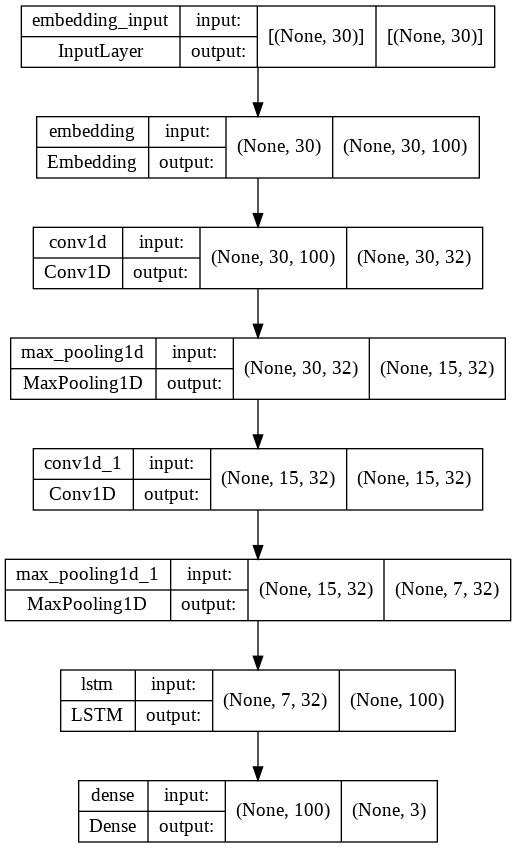

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
13989/13989 - 989s - loss: 0.2661 - accuracy: 0.9153 - val_loss: 0.2367 - val_accuracy: 0.9269 - 989s/epoch - 71ms/step
Epoch 2/10
13989/13989 - 1056s - loss: 0.2188 - accuracy: 0.9319 - val_loss: 0.2301 - val_accuracy: 0.9289 - 1056s/epoch - 76ms/step
Epoch 3/10
13989/13989 - 1048s - loss: 0.2000 - accuracy: 0.9374 - val_loss: 0.2306 - val_accuracy: 0.9295 - 1048s/epoch - 75ms/step
Epoch 4/10
13989/13989 - 805s - loss: 0.1854 - accuracy: 0.9417 - val_loss: 0.2372 - val_accuracy: 0.9285 - 805s/epoch - 58ms/step
Epoch 5/10
13989/13989 - 780s - loss: 0.1730 - accuracy: 0.9454 - val_loss: 0.2485 - val_accuracy: 0.9276 - 780s/epoch - 56ms/step
Epoch 6/10
13989/13989 - 948s - loss: 0.1622 - accuracy: 0.9489 - val_loss: 0.2530 - val_accuracy: 0.9243 - 948s/epoch - 68ms/step
Epoch 7/10
13989/13989 - 966s - loss: 0.1535 - accuracy: 0.9516 - val_loss: 0.2575 - val_accuracy: 0.9245 - 966s/epoch - 69ms/step
Epoch 8/10
13989/13989 - 1144s - loss: 0.1460 - accuracy: 0.9540 - val_loss: 0.

In [ ]:
#gives the probability values of negative, positive and neutral for all the tweets
yhat = model.predict(X_test)

In [ ]:
yhat

array([[1.7743256e-04, 2.1451269e-04, 9.9960810e-01],
       [3.4333922e-03, 2.1149096e-04, 9.9635518e-01],
       [5.3420084e-05, 3.2071115e-05, 9.9991453e-01],
       ...,
       [1.7779947e-03, 9.5456302e-01, 4.3658942e-02],
       [1.1987450e-01, 2.3059512e-02, 8.5706598e-01],
       [7.4495387e-04, 1.8202231e-03, 9.9743479e-01]], dtype=float32)

In [ ]:
yhatd = pd.DataFrame(yhat)

In [ ]:
yhatd

,0,1,2
0,0.000177,0.000215,0.999608
1,0.003433,0.000211,0.996355
2,0.000053,0.000032,0.999915
3,0.001997,0.993720,0.004283
4,0.000147,0.999723,0.000130
...,...,...,...
447621,0.001608,0.000020,0.998372
447622,0.003488,0.996266,0.000247
447623,0.001778,0.954563,0.043659
447624,0.119874,0.023060,0.857066


In [ ]:
# merging the dates with the with predictions 
merged = test_dates.merge(yhatd, left_index=True, right_index=True, how='inner')
merged.dtypes

index           int64
date_clean     object
0             float32
1             float32
2             float32
dtype: object

In [ ]:
merged['date'] = pd.to_datetime(merged['date_clean']).dt.strftime('%Y-%m-%d')
merged.dtypes

index           int64
date_clean     object
0             float32
1             float32
2             float32
date           object
dtype: object

In [ ]:
merged.dtypes

index           int64
date_clean     object
0             float32
1             float32
2             float32
date           object
dtype: object

In [ ]:
merged

,index,date_clean,0,1,2,date
0,374162,2022-01-12,0.000177,0.000215,0.999608,2022-01-12
1,1457983,2021-10-19,0.003433,0.000211,0.996355,2021-10-19
2,15994,2021-06-23,0.000053,0.000032,0.999915,2021-06-23
3,1955467,2021-11-06,0.001997,0.993720,0.004283,2021-11-06
4,1333060,2021-08-19,0.000147,0.999723,0.000130,2021-08-19
...,...,...,...,...,...,...
447621,2116758,2021-12-17,0.001608,0.000020,0.998372,2021-12-17
447622,829529,2021-07-30,0.003488,0.996266,0.000247,2021-07-30
447623,2074326,2021-12-30,0.001778,0.954563,0.043659,2021-12-30
447624,2105365,2021-11-26,0.119874,0.023060,0.857066,2021-11-26


In [ ]:
#saving the scores 
path = "/content/gdrive/MyDrive/project analysis/cleaned_files/"
yhatd.to_csv(path + 'cleaned_files_scores_seq.csv', index=False)

In [ ]:
seq_scores = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/cleaned_files_scores_seq.csv")

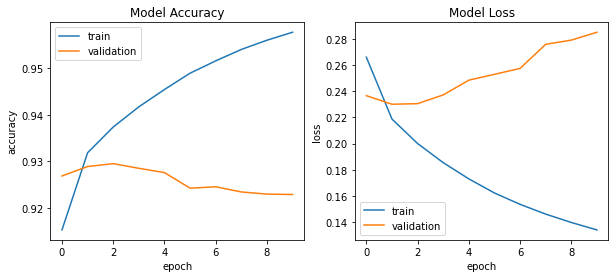

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	92.3%
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     67176
           1       0.91      0.95      0.93    131342
           2       0.95      0.94      0.94    249108

    accuracy                           0.92    447626
   macro avg       0.90      0.90      0.90    447626
weighted avg       0.92      0.92      0.92    447626



2    249108
1    131342
0     67176
dtype: int64
2    246931
1    137564
0     63131
dtype: int64


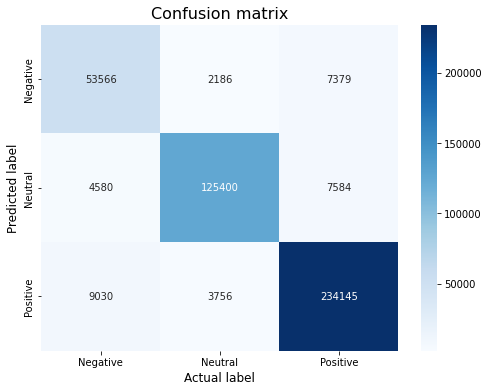

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
a = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/Bitcoin_tweets_clean2.csv")

In [ ]:
a.head(100)

,tweets,cleaned_tweets,date_clean
0,#BTC Price Prediction 2021: @jpmorgan is my fr...,Price Prediction friend Victorian banker He sa...,2021-02-14
1,🚀🚀🚀 $XMR Long Position(v1) 🚀🚀🚀\nEntry Price: 2...,XMR Long Position v Entry Price Target Stop,2021-06-21
2,🚀🚀🚀#BSC #GiveawayWarning #Cryptonews #News #C...,DOGE,2021-04-10
3,Official ESHOP Airdrop. If You Missed Meme Tok...,Official ESHOP Airdrop If You Missed Meme Toke...,2021-06-23
4,Don’t give up on #Bitcoin https://t.co/oXW2a3RQ6F,Don give,2021-06-22
...,...,...,...
95,#Bitcoin's BREAKOUT is IMMINENT!!!!! PUMP or D...,BREAKOUT IMMINENT PUMP DUMP,2021-02-18
96,@TheCryptoLark Simple. Traders often get wreck...,Simple Traders often get wrecked I would simpl...,2021-06-23
97,#Bitcoin crypto https://t.co/kAPGmdURsH,crypto,2021-06-22
98,@nvk What a clown: @JamesGRickards 🤡 \n\nThe #...,What clown The teach hard lesson shhhhhhhhhhhh...,2021-02-06


In [ ]:
price =  pd.read_csv("/content/gdrive/MyDrive/project analysis/BTC-USD.csv")
price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [ ]:
mergeddf = merged.rename(columns={'date': 'Date'})
mergeddf

NameError: ignored

In [ ]:
mergeddf.to_csv(path + 'files_scores_final.csv', index=False)

In [ ]:
mergeddf2 = pd.merge(mergeddf, price, on ='Date')

In [ ]:
path = "/content/gdrive/MyDrive/project analysis/cleaned_files/"
yhatd.to_csv(path + 'cleaned_files_scores_seq.csv', index=False)

In [ ]:
import pandas as pd


In [ ]:
mergeddf2 .to_csv(path + 'cleaned_files_scores_prices.csv', index=False)

In [ ]:
mergeddf2

,index,date_clean,0,1,2,Date,Open,High,Low,Close,Adj Close,Volume
0,374162,2022-01-12,0.000177,0.000215,0.999608,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
1,223812,2022-01-12,0.000065,0.000102,0.999833,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
2,295449,2022-01-12,0.002823,0.004170,0.993007,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
3,267296,2022-01-12,0.000467,0.998568,0.000964,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
4,430198,2022-01-12,0.004359,0.055829,0.939812,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
...,...,...,...,...,...,...,...,...,...,...,...,...
447621,78417,2021-03-11,0.004205,0.000428,0.995367,2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595
447622,137079,2021-03-11,0.980569,0.005426,0.014005,2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595
447623,158251,2021-03-11,0.003860,0.000824,0.995316,2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595
447624,130297,2021-03-11,0.011839,0.005193,0.982968,2021-03-11,55963.179688,58091.062500,54484.593750,57805.121094,57805.121094,56772343595


In [ ]:
final_scores = pd.read_csv("/content/gdrive/MyDrive/project analysis/cleaned_files/files_scores_final.csv")
final_scores

,index,date_clean,0,1,2,Date
0,374162,2022-01-12,0.000177,0.000215,0.999608,2022-01-12
1,1457983,2021-10-19,0.003433,0.000211,0.996355,2021-10-19
2,15994,2021-06-23,0.000053,0.000032,0.999915,2021-06-23
3,1955467,2021-11-06,0.001997,0.993720,0.004283,2021-11-06
4,1333060,2021-08-19,0.000147,0.999723,0.000130,2021-08-19
...,...,...,...,...,...,...
447621,2116758,2021-12-17,0.001608,0.000020,0.998372,2021-12-17
447622,829529,2021-07-30,0.003488,0.996266,0.000247,2021-07-30
447623,2074326,2021-12-30,0.001778,0.954563,0.043659,2021-12-30
447624,2105365,2021-11-26,0.119874,0.023060,0.857066,2021-11-26


In [ ]:
final_scores = final_scores.sort_values(by=['Date'])
final_scores = final_scores.drop(['index', 'date_clean'], axis=1)
#final_scores = final_scores.reset_index()

In [ ]:
final_scores = final_scores.reset_index()

In [ ]:
final_scores = final_scores.drop(['index'], axis=1)
final_scores

,0,1,2,Date
0,0.013771,0.009821,0.976408,2021-02-05
1,0.004370,0.990364,0.005267,2021-02-05
2,0.016768,0.959533,0.023699,2021-02-05
3,0.012443,0.961008,0.026550,2021-02-05
4,0.007632,0.005872,0.986495,2021-02-05
...,...,...,...,...
447621,0.016316,0.012149,0.971535,2022-01-22
447622,0.000031,0.000014,0.999955,2022-01-22
447623,0.999431,0.000170,0.000399,2022-01-22
447624,0.002526,0.000657,0.996817,2022-01-22


In [ ]:
print(final_scores['Date'].unique())

['2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-13' '2021-02-14' '2021-02-15' '2021-02-18'
 '2021-02-19' '2021-02-22' '2021-02-28' '2021-03-11' '2021-03-12'
 '2021-04-05' '2021-04-06' '2021-04-07' '2021-04-08' '2021-04-09'
 '2021-04-10' '2021-04-11' '2021-04-12' '2021-04-17' '2021-04-18'
 '2021-04-19' '2021-04-20' '2021-04-21' '2021-04-22' '2021-04-23'
 '2021-04-24' '2021-05-25' '2021-05-26' '2021-05-27' '2021-05-28'
 '2021-05-29' '2021-06-20' '2021-06-21' '2021-06-22' '2021-06-23'
 '2021-07-02' '2021-07-03' '2021-07-04' '2021-07-05' '2021-07-16'
 '2021-07-17' '2021-07-18' '2021-07-19' '2021-07-20' '2021-07-21'
 '2021-07-22' '2021-07-23' '2021-07-24' '2021-07-25' '2021-07-26'
 '2021-07-27' '2021-07-28' '2021-07-29' '2021-07-30' '2021-08-04'
 '2021-08-05' '2021-08-06' '2021-08-07' '2021-08-08' '2021-08-09'
 '2021-08-14' '2021-08-15' '2021-08-16' '2021-08-17' '2021-08-18'
 '2021-08-19' '2021-08-20' '2021-08-21' '2021-08-23' '2021-08-24'
 '2021-08-

In [ ]:
new_final_scores =  final_scores.groupby('Date').mean()
new_final_scores

,0,1,2
Date,,,
2021-02-05,0.117435,0.473202,0.409363
2021-02-06,0.121292,0.504511,0.374197
2021-02-07,0.162183,0.509655,0.328162
2021-02-08,0.131406,0.422220,0.446373
2021-02-09,0.154385,0.423849,0.421766
...,...,...,...
2022-01-14,0.136183,0.283196,0.580621
2022-01-19,0.139374,0.335499,0.525127
2022-01-20,0.161053,0.286247,0.552700


In [ ]:
new_final_scores['col name'] = new_final_scores[['0','1','2']].idxmax(axis=1)

In [ ]:
new_final_scores['score'] = [1 if x == '2' else 0 for x in new_final_scores['col name']]
new_final_scores

,0,1,2,col name,score
Date,,,,,
2021-02-05,0.117435,0.473202,0.409363,1,0
2021-02-06,0.121292,0.504511,0.374197,1,0
2021-02-07,0.162183,0.509655,0.328162,1,0
2021-02-08,0.131406,0.422220,0.446373,2,1
2021-02-09,0.154385,0.423849,0.421766,1,0
...,...,...,...,...,...
2022-01-14,0.136183,0.283196,0.580621,2,1
2022-01-19,0.139374,0.335499,0.525127,2,1
2022-01-20,0.161053,0.286247,0.552700,2,1


In [ ]:
new_final_scores = new_final_scores.drop(['col name'], axis=1)
new_final_scores

,0,1,2,score
Date,,,,
2021-02-05,0.117435,0.473202,0.409363,0
2021-02-06,0.121292,0.504511,0.374197,0
2021-02-07,0.162183,0.509655,0.328162,0
2021-02-08,0.131406,0.422220,0.446373,1
2021-02-09,0.154385,0.423849,0.421766,0
...,...,...,...,...
2022-01-14,0.136183,0.283196,0.580621,1
2022-01-19,0.139374,0.335499,0.525127,1
2022-01-20,0.161053,0.286247,0.552700,1


In [ ]:
price =  pd.read_csv("/content/gdrive/MyDrive/project analysis/BTC-USD.csv")
price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [ ]:
price_twitter = pd.merge(new_final_scores, price, on ='Date')
price_twitter.head(50)

,Date,0,1,2,score,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,0.117435,0.473202,0.409363,0,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,0.121292,0.504511,0.374197,0,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,0.162183,0.509655,0.328162,0,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,0.131406,0.422220,0.446373,1,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,0.154385,0.423849,0.421766,0,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
5,2021-02-10,0.128674,0.386674,0.484651,1,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896
6,2021-02-13,0.130322,0.424962,0.444716,1,47491.203125,48047.746094,46392.281250,47105.515625,47105.515625,70250456155
7,2021-02-14,0.117556,0.350005,0.532438,1,47114.507813,49487.640625,47114.507813,48717.289063,48717.289063,71248675228
8,2021-02-15,0.098044,0.250839,0.651117,1,48696.535156,48875.570313,46347.476563,47945.058594,47945.058594,77069903166
9,2021-02-18,0.144995,0.428790,0.426216,0,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579


In [ ]:
#bc = [1 if price_twitter['Close'] > price_twitter['Open']  else -1 ]
price_twitter['price_sentiment'] = -1
price_twitter.loc[price_twitter['Close'] > price_twitter['Open'],'price_sentiment'] = 1

In [ ]:
price_twitter.tail(50)

,Date,0,1,2,score,Open,High,Low,Close,Adj Close,Volume,price_sentiment
59,2021-08-04,0.133708,0.298559,0.567733,1,38213.332031,39952.296875,37589.164063,39747.503906,39747.503906,25372562724,1
60,2021-08-05,0.172366,0.318573,0.509061,1,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,35185031017,1
61,2021-08-06,0.148169,0.298944,0.552887,1,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046,1
62,2021-08-07,0.154854,0.299924,0.545222,1,42832.796875,44689.859375,42618.566406,44555.800781,44555.800781,40030862141,1
63,2021-08-08,0.138956,0.285648,0.575396,1,44574.437500,45282.351563,43331.910156,43798.117188,43798.117188,36302664750,-1
64,2021-08-09,0.113874,0.235280,0.650845,1,43791.925781,46456.832031,42848.687500,46365.402344,46365.402344,38734079049,1
65,2021-08-14,0.121429,0.266727,0.611844,1,47810.687500,48098.683594,46177.632813,47096.945313,47096.945313,31211354442,-1
66,2021-08-15,0.128641,0.299348,0.572011,1,47096.667969,47357.105469,45579.589844,47047.003906,47047.003906,30988958446,-1
67,2021-08-16,0.120671,0.289896,0.589433,1,47019.960938,47998.097656,45700.320313,46004.484375,46004.484375,32776876610,-1
68,2021-08-17,0.117322,0.268260,0.614419,1,45936.457031,47139.570313,44512.417969,44695.359375,44695.359375,33451362600,-1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
X = np.array(price_twitter['score']).reshape(-1, 1)
y = np.array(price_twitter['price_sentiment']).reshape(-1, 1)
Xd = np.array(price_twitter['Date']).reshape(-1,1)
X_train, X_test,X_train_dates, X_test_dates,y_train, y_test = train_test_split(X,Xd, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print("Naive Bayes score: ",gnb.score(X_test, y_test))

Naive Bayes score:  0.4


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

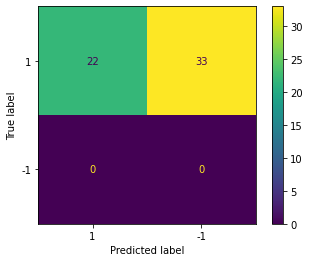

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, -1])
cm_display.plot()
plt.show()
#y_test
# plt.scatter(X_train[:, 0], c=y_train, s=50, cmap='RdBu')
# lim = plt.axis()
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
# plt.axis(lim);

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
reg.score(X_train, y_train)

0.5925925925925926

In [ ]:
y_test

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1]])

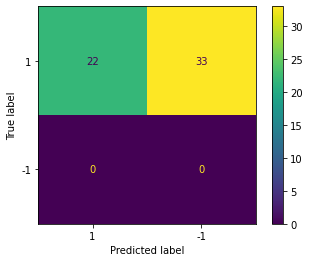

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1', '-1'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
dtc.score(X_train, y_train)

0.5925925925925926

In [ ]:
rfc.score(X_train, y_train)

0.5925925925925926

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc.score(X_train, y_train)

0.5925925925925926

In [ ]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn.score(X_train, y_train)

0.4444444444444444